In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv("../input/train_yaOffsB.csv")

In [44]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [46]:
df["Number_Weeks_Used"].value_counts()

20.0    3878
30.0    3765
25.0    3120
40.0    2707
15.0    2486
        ... 
63.0      50
64.0      44
65.0      31
66.0      17
67.0       8
Name: Number_Weeks_Used, Length: 64, dtype: int64

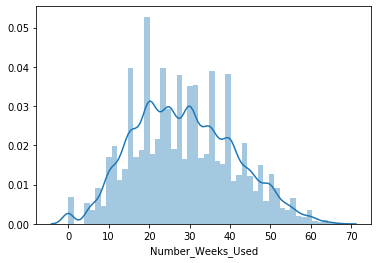

In [47]:
sns.distplot(df["Number_Weeks_Used"])

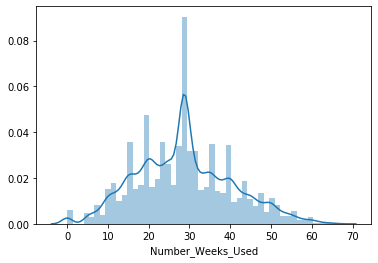

In [51]:
sns.distplot(df["Number_Weeks_Used"].fillna(df["Number_Weeks_Used"].mean()))

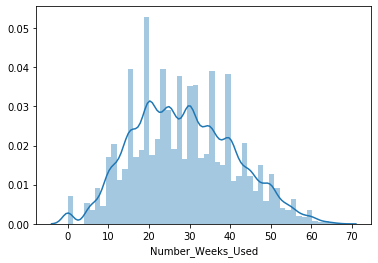

In [52]:
sns.distplot(df["Number_Weeks_Used"].ffill())

In [54]:
df["Number_Weeks_Used"].ffill().isnull().sum()

0

In [4]:
df.drop("ID",axis=1,inplace=True)

In [5]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [6]:
df.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

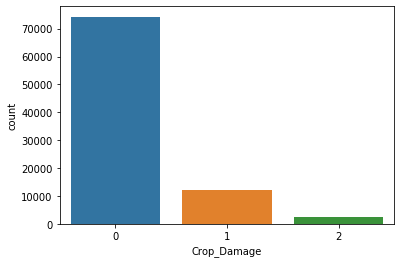

In [7]:
sns.countplot(df["Crop_Damage"])

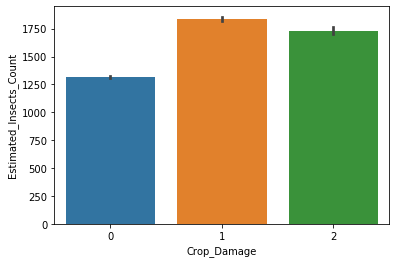

In [8]:
sns.barplot(x="Crop_Damage",y="Estimated_Insects_Count",data=df)

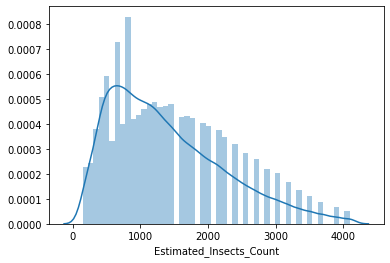

In [9]:
sns.distplot(df["Estimated_Insects_Count"])

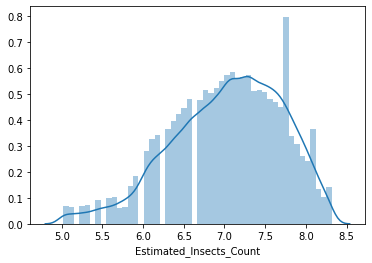

In [10]:
sns.distplot(np.log(df["Estimated_Insects_Count"]+1))

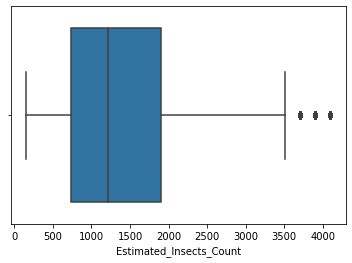

In [11]:
sns.boxplot(df["Estimated_Insects_Count"])

In [12]:
df["Estimated_Insects_Count"] = np.where(df["Estimated_Insects_Count"]>3500,3500,df["Estimated_Insects_Count"])

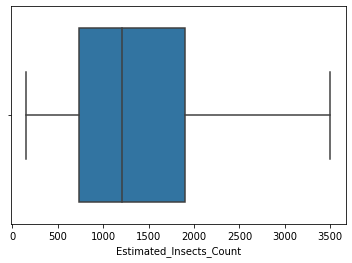

In [13]:
sns.boxplot(df["Estimated_Insects_Count"])

In [14]:
df["Crop_Type"].value_counts()

0    63589
1    25269
Name: Crop_Type, dtype: int64

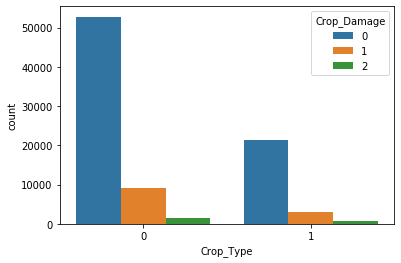

In [15]:
sns.countplot(x="Crop_Type",hue="Crop_Damage",data=df)

In [16]:
df["Crop_Type"]=np.where(df["Crop_Type"]==0,1,2)

In [17]:
df["Crop_Type"].value_counts()

1    63589
2    25269
Name: Crop_Type, dtype: int64

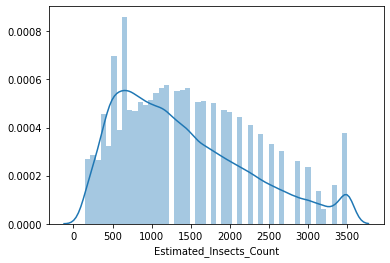

In [18]:
sns.distplot(df["Estimated_Insects_Count"])

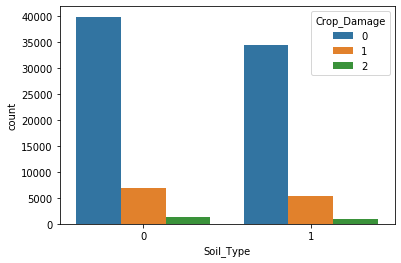

In [19]:
sns.countplot(x="Soil_Type",hue="Crop_Damage",data=df)

In [20]:
df["Soil_Type"]=np.where(df["Soil_Type"]==0,1,2)

In [21]:
df["Soil_Type"].value_counts()

1    48124
2    40734
Name: Soil_Type, dtype: int64

In [22]:
df["Pesticide_Use_Category"].value_counts()

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

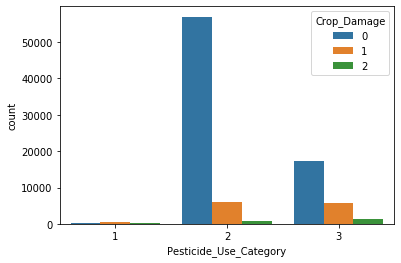

In [23]:
sns.countplot(x="Pesticide_Use_Category",hue="Crop_Damage",data=df)

In [24]:
df.groupby("Pesticide_Use_Category").mean()["Crop_Damage"]

Pesticide_Use_Category
1    1.056153
2    0.116624
3    0.354516
Name: Crop_Damage, dtype: float64

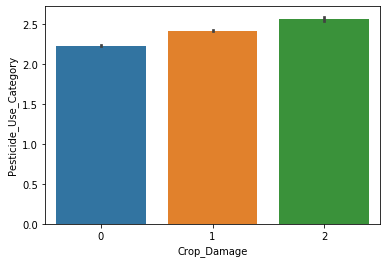

In [25]:
sns.barplot(x="Crop_Damage",y="Pesticide_Use_Category",data=df)

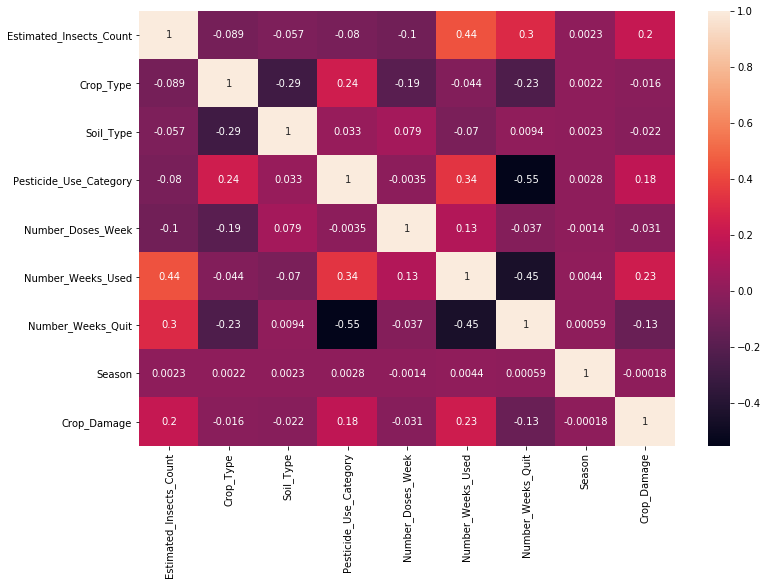

In [26]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),annot=True)

In [27]:
df["Number_Doses_Week"]

0         0
1         0
2         0
3         0
4         0
         ..
88853    10
88854    10
88855    15
88856    10
88857    20
Name: Number_Doses_Week, Length: 88858, dtype: int64

In [28]:
bins=int(np.ceil(1+np.log(len(df["Number_Doses_Week"]))))

In [29]:
df["Number_Doses_Week"]=pd.cut(df["Number_Doses_Week"],bins=bins,labels=False)

In [30]:
df["Number_Doses_Week"].value_counts()

2     30767
5     12298
4     12270
1     12111
0      6357
3      4890
8      4431
6      4297
10      733
9       303
7       277
12      113
11       11
Name: Number_Doses_Week, dtype: int64

In [32]:
df["Number_Weeks_Used"].value_counts()

20.0    3878
30.0    3765
25.0    3120
40.0    2707
15.0    2486
        ... 
63.0      50
64.0      44
65.0      31
66.0      17
67.0       8
Name: Number_Weeks_Used, Length: 64, dtype: int64

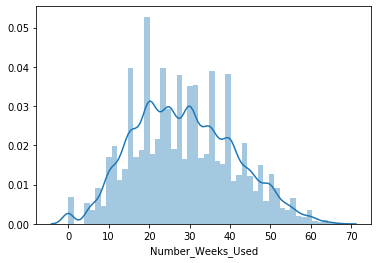

In [33]:
sns.distplot(df["Number_Weeks_Used"])

In [39]:
bins=int(np.ceil(1+np.log(len(df["Number_Weeks_Quit"]))))
bins

13

In [36]:
df["Number_Doses_Quit_bin"]=pd.cut(df["Number_Weeks_Used"],bins=bins,labels=False)

In [38]:
df["Number_Weeks_Quit"].value_counts()

0     27274
10     2893
5      2831
2      2743
12     2701
15     2668
1      2620
14     2610
6      2584
3      2578
4      2528
13     2485
7      2418
8      2294
20     2209
16     2108
11     2090
18     2030
17     2018
9      1897
19     1841
21     1436
22     1414
23     1166
25     1109
24     1054
26      894
27      820
28      808
30      751
29      719
31      530
32      505
33      370
34      345
35      301
36      248
37      221
38      162
40      133
39      109
41       86
42       75
43       51
44       38
45       30
46       22
47       21
48       10
50        6
49        4
Name: Number_Weeks_Quit, dtype: int64

In [40]:
df["Season"].value_counts()

2    44210
1    26902
3    17746
Name: Season, dtype: int64

In [42]:
df["Crop_Damage"].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64